In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

In [3]:
# Import crime file as DataFrame
crime_pd = pd.read_csv("City Data/2010-2019_Crime.csv")
crime_pd.head()

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,Weapon,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,0,0,0,0,0,0,41.881557,-87.627759
1,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,2,0,0,0,0,0,41.880831,-87.629159
2,32,Central,Loop,2010,Jan,BATTERY,35,12,35,0,2,0,0,0,0,0,41.878982,-87.627872
3,32,Central,Loop,2010,Jan,BURGLARY,8,1,0,0,0,0,0,0,0,0,41.883088,-87.631038
4,32,Central,Loop,2010,Jan,CRIM SEXUAL ASSAULT,1,0,1,0,0,0,0,0,0,0,41.885742,-87.631499


In [4]:
# Filter on homicides and drop unneccesary rows
homicides_df = crime_pd.loc[crime_pd["Primary Type"] == "HOMICIDE"]
homicides_df = homicides_df[["Year", "Months", "Primary Type", "Community", "Crimes"]]
homicides_df

,Year,Months,Primary Type,Community,Crimes
25,2010,Jan,HOMICIDE,Near North Side,1
180,2010,Jan,HOMICIDE,Rogers Park,1
366,2010,Jan,HOMICIDE,Roseland,1
388,2010,Jan,HOMICIDE,South Chicago,2
426,2010,Jan,HOMICIDE,West Pullman,1
...,...,...,...,...,...
152807,2019,Dec,HOMICIDE,Austin,5
152828,2019,Dec,HOMICIDE,East Garfield Park,2
152846,2019,Dec,HOMICIDE,Humboldt Park,1
152865,2019,Dec,HOMICIDE,Lower West Side,1


In [5]:
print("There were 2927 homicides in Chicago in the 2010s.")

There were 2927 homicides in Chicago in the 2010s.


In [6]:
# Groupby Year
homicides_by_year = homicides_df.groupby('Year').sum()
homicides_by_year.reset_index(level=0, inplace = True)
homicides_by_year

,Year,Crimes
0,2010,438
1,2011,438
2,2012,515
3,2013,429
4,2014,426
5,2015,502
6,2016,788
7,2017,674
8,2018,592
9,2019,503


In [50]:
# Create Variables
year = homicides_by_year.iloc[:,0]
homicides = homicides_by_year.iloc[:,1]

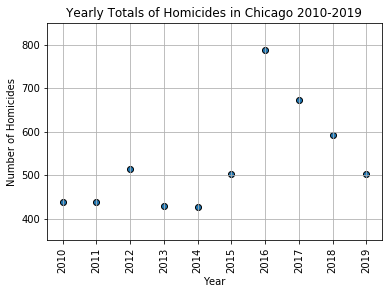

In [51]:
# Create a Scatter Plot for year vs. homicide totals
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2010-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# y range
plt.ylim(350, 850)

# Save the figure
plt.savefig("Pictures/Yearly Homicide Totals.png")

# Show Plot
plt.show()

In [52]:
# Perform a linear regression on year versus homicides
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(year, homicides)

In [53]:
# equation for line for predicted homicide rate
fit = slope * year + intercept

In [54]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 21.88x +-43556.53


The r-squared is: 0.5495737448360712


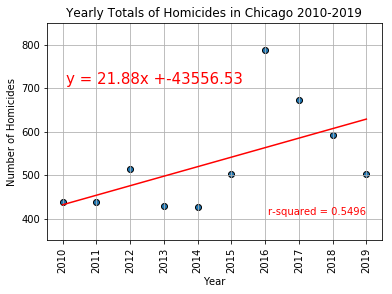

In [64]:
#### Add fit line to scatter
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2010-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# add fit line
plt.plot(year,fit,"r-")

# y range
plt.ylim(350, 850)

# add fit line equation
plt.annotate(line_eq,(2010.1,710),fontsize=15,color="red")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue,4)}",(2016.1,410),fontsize=10,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("Pictures/2010-2019 Regression.png")

# Show Plot
plt.show()

In [13]:
# Adding 2020 as "x":

y = 21.88 * 2020 - 43556.53
print(f"This model predicts {round(y)} homicides in Chicago in 2020.")

This model predicts 641 homicides in Chicago in 2020.


In [14]:
# Why is this a poor model? 
# Nationwide crime spike in 2016. 
# New policing tactics since 2016.

In [15]:
# New Dataframe just on 2016-2019

homicides_2016_on = homicides_by_year.iloc[6:10, :]
homicides_2016_on

,Year,Crimes
6,2016,788
7,2017,674
8,2018,592
9,2019,503


In [16]:
# Create Variables
year_post_2016 = homicides_2016_on.iloc[:,0]
homicides_post_2016 = homicides_2016_on.iloc[:,1]

In [17]:
# Perform a linear regression on year versus homicides
(slope_2016, intercept_2016, rvalue_2016, pvalue_2016, stderr_2016) = stats.linregress(year_post_2016, homicides_post_2016)

In [18]:
# equation for line for predicted homicide rate
fit_post_2016 = slope_2016 * year_post_2016 + intercept_2016

In [19]:
# Create line equation string
line_eq_post_2016 = "y = " + str(round(slope_2016,2)) + "x +" + str(round(intercept_2016,2))

The r-squared is: -0.997364575625488


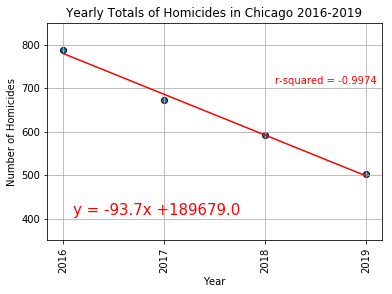

In [63]:
# Scatter plot with fit line
plt.scatter(year_post_2016, homicides_post_2016, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2016-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year_post_2016, rotation=90)

# add fit line
plt.plot(year_post_2016,fit_post_2016,"r-")

# add fit line equation
plt.annotate(line_eq_post_2016,(2016.1,410),fontsize=15,color="red")

# y range
plt.ylim(350, 850)

# Print r square value
print(f"The r-squared is: {rvalue_2016}")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue_2016,4)}",(2018.1,710),fontsize=10,color="red")

# Save the figure
plt.savefig("Pictures/2016-2019 Regression.png")

# Show Plot
plt.show()

In [21]:
# Adding 2020 as "x":

y = -93.7 * 2020 + 189679.0
print(f"This model predicts {round(y)} homicides in Chicago in 2020.")

This model predicts 405 homicides in Chicago in 2020.


In [22]:
# load community list
communities_csv = "City Data/Chicago_Communities.csv"
chicago_communities = pd.read_csv(communities_csv)
chicago_communities.head()

,Community #,City Area,Community,Neighborhood
0,8,Central,Near North Side,Cabrini-Green
1,8,Central,Near North Side,The Gold Coast
2,8,Central,Near North Side,Goose Island
3,8,Central,Near North Side,Magnificent Mile
4,8,Central,Near North Side,Old Town


In [23]:
# Merge crime and community data
merge_data = pd.merge(crime_pd, chicago_communities, on="Community")
merge_data.head()

,Community #_x,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng,Community #_y,City Area,Neighborhood
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,Loop
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,New Eastside
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,South Loop
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,West Loop Gate
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,0,0,0,0,0,41.880831,-87.629159,32,Central,Loop


In [27]:
merge_data=merge_data.rename(columns={"Community #_x": "Community #"})
merge_data.head()

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng,Community #_y,City Area,Neighborhood
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,Loop
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,New Eastside
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,South Loop
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,0,0,0,0,0,41.881557,-87.627759,32,Central,West Loop Gate
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,0,0,0,0,0,41.880831,-87.629159,32,Central,Loop


In [28]:
# Taking advantage of the City of Chicago's data portal, we found an interesting metric to compare against homicide numbers:
# the rate of adults over 25 without a high school diploma per neighborhood.

In [29]:
# load social metrics by community area spreadsheet
per_capita_income="Per_Capita_Income 2008-2012.csv"
edu_data=pd.read_csv(per_capita_income)
edu_data_renamed=edu_data.rename(columns={"Community Area Number": "Community #"})
edu_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [30]:
# Merge crime and social data
complete_data = pd.merge(merge_data, edu_data_renamed, on="Community #")
complete_data.head()

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,City Area,Neighborhood,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,New Eastside,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,South Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,West Loop Gate,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


In [31]:
complete_data["Community"].value_counts()

Near North Side    19416
West Town          16310
Near West Side     14436
Irving Park        14217
Lakeview           10690
                   ...  
Oakland             1451
Hegewisch           1421
Montclare           1384
Burnside            1319
Edison Park          987
Name: Community, Length: 77, dtype: int64

In [32]:
complete_filter_by_commun=complete_data.loc[(complete_data["Community"]=="Loop") | 
                       (complete_data["Community"]=="Rogers Park") | 
                       (complete_data["Community"]=="South Chicago")| 
                       (complete_data["Community"]=="Morgan Park")|
                       (complete_data["Community"]=="Logan Square")|
                       (complete_data["Community"]=="Portage Park")|
                       (complete_data["Community"]=="Hyde Park")|
                       (complete_data["Community"]=="Englewood")|
                       (complete_data["Community"]=="Humboldt Park")]
complete_filter_by_commun

,Community #,Area,Community,Year,Months,Primary Type,Crimes,Arrests,Violent,Gun_Violence,...,City Area,Neighborhood,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
1,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,New Eastside,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
2,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,South Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
3,32,Central,Loop,2010,Jan,ARSON,1,0,0,0,...,Central,West Loop Gate,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
4,32,Central,Loop,2010,Jan,ASSAULT,29,15,2,0,...,Central,Loop,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328421,23,West Side,Humboldt Park,2019,Dec,PUBLIC PEACE VIOLATION,3,2,0,0,...,West Side,Humboldt Park,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
328422,23,West Side,Humboldt Park,2019,Dec,ROBBERY,24,1,24,11,...,West Side,Humboldt Park,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
328423,23,West Side,Humboldt Park,2019,Dec,SEX OFFENSE,1,0,0,0,...,West Side,Humboldt Park,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
328424,23,West Side,Humboldt Park,2019,Dec,THEFT,91,8,0,0,...,West Side,Humboldt Park,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0


In [33]:
# Filter on homicides and drop unneccesary rows and columns
homicides_df = complete_filter_by_commun.loc[(complete_filter_by_commun["Primary Type"] == "HOMICIDE")]
homicides_df = homicides_df[["Year","Primary Type", "COMMUNITY AREA NAME","PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]
homicides_df

,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
304,2010,HOMICIDE,Loop,3.1
305,2010,HOMICIDE,Loop,3.1
306,2010,HOMICIDE,Loop,3.1
307,2010,HOMICIDE,Loop,3.1
1152,2011,HOMICIDE,Loop,3.1
...,...,...,...,...
328311,2019,HOMICIDE,Humboldt park,35.4
328333,2019,HOMICIDE,Humboldt park,35.4
328355,2019,HOMICIDE,Humboldt park,35.4
328376,2019,HOMICIDE,Humboldt park,35.4


In [34]:
# Filter for 2010, this is a period we have data for 
homicides_2010_df = homicides_df[homicides_df.Year == 2010]
homicides_2010_df

,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
304,2010,HOMICIDE,Loop,3.1
305,2010,HOMICIDE,Loop,3.1
306,2010,HOMICIDE,Loop,3.1
307,2010,HOMICIDE,Loop,3.1
79168,2010,HOMICIDE,Rogers Park,18.2
...,...,...,...,...
325982,2010,HOMICIDE,Humboldt park,35.4
326004,2010,HOMICIDE,Humboldt park,35.4
326045,2010,HOMICIDE,Humboldt park,35.4
326068,2010,HOMICIDE,Humboldt park,35.4


In [35]:
# format new df
df = pd.DataFrame(homicides_2010_df['COMMUNITY AREA NAME'].value_counts())
df = df.reset_index()
df.columns = ['COMMUNITY AREA NAME','HOMICIDE COUNT']
df


,COMMUNITY AREA NAME,HOMICIDE COUNT
0,Morgan Park,18
1,Humboldt park,11
2,South Chicago,8
3,Logan Square,8
4,Portage Park,6
5,Englewood,6
6,Loop,4
7,Rogers Park,3
8,Hyde Park,2


In [36]:
# merging
df = homicides_2010_df.merge(df,how="inner",on='COMMUNITY AREA NAME')

In [37]:
# comparing homicide numbers to adult education numbers
df = df.groupby('COMMUNITY AREA NAME')[['HOMICIDE COUNT','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']].max()
df

,HOMICIDE COUNT,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
COMMUNITY AREA NAME,,
Englewood,6,28.5
Humboldt park,11,35.4
Hyde Park,2,4.3
Logan Square,8,14.8
Loop,4,3.1
Morgan Park,18,10.8
Portage Park,6,19.3
Rogers Park,3,18.2
South Chicago,8,26.6


In [38]:
# Let's see how our chosen neighborhoods compare to each other in number of homicides.

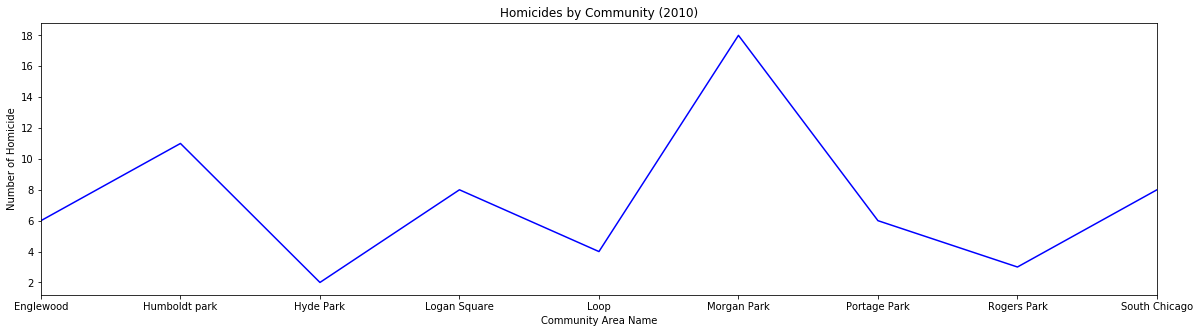

In [39]:
# Homicide & Community Graph
plt.figure(figsize=(20,5))
df['HOMICIDE COUNT'].plot(color='b')
plt.title("Homicides by Community (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('Number of Homicide')

# Save the figure
plt.savefig("Pictures/Homicides By Community.png")

In [40]:
# Taking advantage of the City of Chicago's data portal, we found an interesting metric to compare against homicide numbers:
# the rate of adults over 25 without a high school diploma per neighborhood.

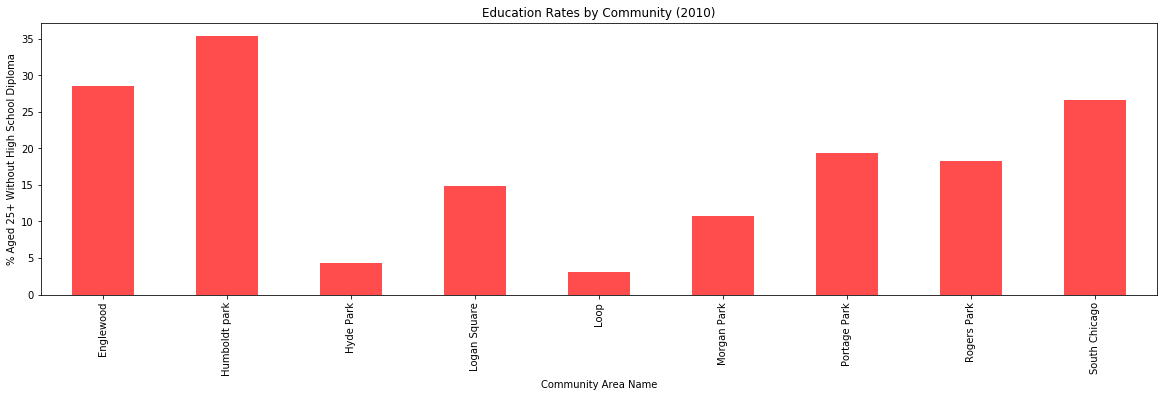

In [41]:
# Education & Community Graph
plt.figure(figsize=(20,5))
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar', color='r', alpha=0.7, align="center")
plt.title("Education Rates by Community (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('% Aged 25+ Without High School Diploma')

# Save the figure
plt.savefig("Pictures/Education by Community.png")

In [42]:
#This metric interacts with neighborhood investment, employment rate, and, as we'll see, crime rates.

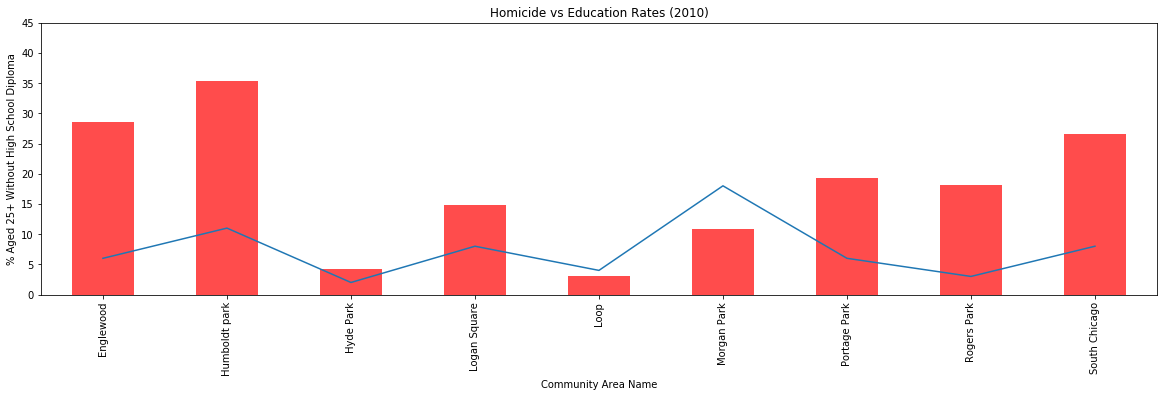

In [43]:
# Homicide on Education Graph
plt.figure(figsize=(20,5))
df['HOMICIDE COUNT'].plot()
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar',color='r', alpha=0.7, align="center")
plt.title("Homicide vs Education Rates (2010)")
plt.xlabel('Community Area Name')
plt.ylabel('% Aged 25+ Without High School Diploma')
plt.ylim(0, 45)

# Save the figure
plt.savefig("Pictures/Homicide vs Education.png")

plt.show()

In [70]:
# Create Variables
homicides_on_ed = df.iloc[:,0]
ed_rates = df.iloc[:,1]

In [74]:
# Perform a linear regression on year versus homicides
(slope_ed, intercept_ed, rvalue_ed, pvalue_ed, stderr_ed) = stats.linregress(ed_rates, homicides_on_ed)

In [75]:
# equation for line for predicted homicide rate
fit_ed = slope_ed * ed_rates + intercept_ed

In [76]:
# Create line equation string
line_eq_ed = "y = " + str(round(slope_ed,2)) + "x +" + str(round(intercept_ed,2))

The r-squared is: 0.22645416439161206


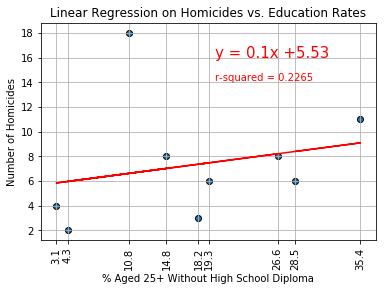

In [77]:
# Create a Scatter Plot for year vs. homicide totals
plt.scatter(ed_rates, homicides_on_ed, marker="o", edgecolors="black")

# Graph Properties
plt.title("Linear Regression on Homicides vs. Education Rates")
plt.xlabel('% Aged 25+ Without High School Diploma')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(ed_rates, rotation=90)

# add fit line
plt.plot(ed_rates,fit_ed,"r-")

# add fit line equation
plt.annotate(line_eq_ed,(20,16),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue_ed}")

# add r-squared
plt.annotate(f"r-squared = {round(rvalue_ed,4)}",(20,14.1),fontsize=10,color="red")

# Save the figure
plt.savefig("Pictures/Homicide - Education Regression.png")

# Show Plot
plt.show()